<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/LSTM_Recurrent_Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import concat
pd.pandas.set_option('display.max_columns', None)
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense, Dropout

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
np.random.seed(7)

In [4]:
df.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [5]:
df_for_training = df.drop(columns = ["sasdate", "S&P 500"]).astype(float)
df_for_training.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.022349,4.337246e-04,0.000128,0.019023,-0

In [6]:
data = df.drop([0]).copy()

In [7]:
date = df["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-02-01
1,1959-03-01
2,1959-04-01
3,1959-05-01
4,1959-06-01
...,...
749,2021-07-01
750,2021-08-01
751,2021-09-01
752,2021-10-01


In [8]:
df

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.000000,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,4.993606e-06,0.000012,2.235532e-05,0.000000,0.000000,1.898611e-05,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,2.193844e-05,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.000000,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000e+00,0.000046,2.214541e-05,0.000009,0.000027,0.000000e+00,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,2.173437e-05,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.000000,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,4.993606e-06,0.000011,0.000000e+00,0.000000,0.000000,1.882173e-05,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,2.153312e-05,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.

In [9]:
df["S&P 500"]

0     -0.015400
1      0.025062
2      0.016599
3      0.014949
4     -0.008664
         ...   
749    0.029116
750    0.020527
751   -0.001948
752    0.003407
753    0.045292
Name: S&P 500, Length: 754, dtype: float64

In [10]:
check_stationarity(df["S&P 500"])

ADF Statistic: -10.815209
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Stationary


In [11]:
SP500 = df[["S&P 500", "sasdate"]].copy()

In [12]:
SP500.index = pd.DatetimeIndex(SP500["sasdate"])
SP500 = SP500.drop(columns = ["sasdate"])

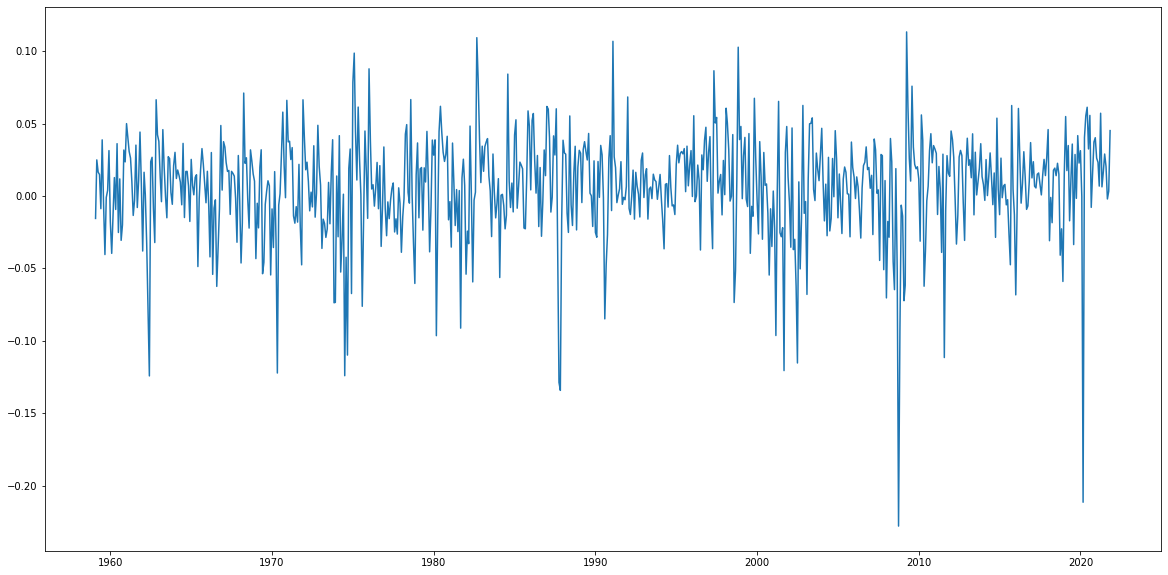

In [13]:
SP500_ts = pd.Series(SP500["S&P 500"].values, index = SP500.index)
plt.figure(figsize= (20, 10))
plt.plot(SP500_ts)

In [14]:
date = pd.to_datetime(date['sasdate'])

In [15]:
data = df.drop(columns = "sasdate")

In [16]:
scaler = StandardScaler()

In [17]:
scaler = scaler.fit(data)

In [18]:
data_scaled = scaler.transform(data)

In [19]:
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

In [20]:
data_scaled.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.107257,0.193067,0.906991,0.164081,1.707075,1.151713,0.607848,0.542568,0.090192,1.065999,0.575787,2.321929,2.268348,1.332693,1.394931,-0.140381,-0.713079,1.474901,-1.732075,-0.605745,-0.222135,-0.990012,-0.138541,-0.055404,-1.396903,-0.894396,-1.259852,-0.253639,0.430873,0.738266,-0.669219,-0.520530,1.298582,1.466930,0.713124,0.274120,0.490540,0.433509,0.628154,-0.406563,0.010626,-0.903034,0.688536,-0.643771,0.637289,1.877376,1.442205,-0.605527,0.153066,1.030374,1.886555,-0.037889,-0.215086,0.269457,-0.085871,-0.080501,-27.439750,-0.194789,0.476739,-0.594518,-0.633031,-0.092894,-0.279421,0.112180,0.450586,-0.146959,-0.208253,0.101340,0.104998,1.013628,1.330531,1.390107,0.608709,0.301341,-0.179200,-0.296233,0.093775,0.065758,0.092551,0.567429,-0.345178,-0.412157,-0.287865,-0.320280,-0.199556,-0.416844,-0.259855,-0.217146,-0.127949,-0.342790,-0.257251,-0.065176,-0.567635,-0.479131,-0.563621,-0.589231,-0.439016,-0.328579,-0.654659,0.027647,-0.265390,0.009340,-0.276807
1,0.312172,0.803606,0.794708,0.228120,1.206321,0.411042,0.264905,-0.146007,0.526220,-0.780724,0.429574,1.878733,1.925516,1.126515,1.162358,0.130472,1.121862,1.225328,1.614754,1.183254,-0.677272,-0.262696,-0.670955,-0.726949,-0.851350,-0.293541,-1.020006,-0.751150,0.789440,1.413267,0.004438,0.913624,1.576070,1.838441,0.711313,0.422284,0.744650,0.682746,1.134785,1.079116,0.182293,-0.441832,1.391999,-0.508448,0.543946,1.763662,1.136354,-0.638572,0.377990,0.454040,1.931818,-0.038041,-0.145250,0.621468,-0.141388,-0.083066,0.036389,-0.185606,-0.181437,0.536163,0.514786,0.740464,0.249029,0.010211,0.181532,0.107113,0.122089,-0.036918,-0.179951,0.627081,0.838834,0.993500,0.351797,0.087879,-0.379022,-0.500966,0.173006,0.065758,0.102520,-0.410800,-0.440931,-0.352570,-0.339201,-0.330080,-0.196656,-0.343017,-0.326673,-0.150502,-0.134520,-0.247996,0.101903,-0.578754,-0.567635,-0.479131,-0.563621,-0.608654,-0.396871,-0.325340,-0.609418,0.021776,-0.265390,1.632745,1.841967
2,0.317421,0.752973,-0.735617,-0.259798,1.872453,1.245615,1.153014,1.328569,0.125492,1.972493,1.293071,2.007187,1.443213,2.442646,1.644600,0.052361,-0.276330,1.793418,0.906931,0.982323,-0.904840,-0.505135,0.247790,-1.806335,-2.377297,-2.706896,-1.034951,-0.495271,0.724460,1.565552,0.097888,2.089856,1.372004,1.614989,0.569944,0.226337,0.313381,1.059753,-1.162567,0.886764,-0.025015,-0.134364,0.688536,-0.373125,0.482939,1.325769,1.004687,-0.426287,0.476847,0.176996,1.124499,-0.038125,-0.243432,-0.003559,-0.123866,-0.080399,0.036691,0.013245,0.444568,0.299679,0.347722,0.323785,0.369132,0.367105,0.279370,0.424702,0.489137,0.470028,0.057506,0.612764,0.812256,0.927398,0.329128,0.069044,-0.410573,-0.575869,0.081500,0.065758,0.109119,-0.505918,-0.440931,-0.352570,-0.339201,-0.320363,-0.199556,-0.398500,-0.259855,-0.217599,-0.827738,-0.342790,-0.257251,-0.069623,-0.233694,-0.479131,-0.563621,-0.441103,-0.414845,-0.326635,-0.119591,0.015986,0.214544,-0.006500,-0.558143
3,0.257473,0.682545,1.099055,0.195333,1.270006,0.635531,0.696271,0.303193,0.549437,-0.166126,1.643335,1.862259,1.678732,0.622450,1.015687,0.355953,-0.980258,1.094993,-1.129207,-0.334490,-

In [21]:
SP500_new = pd.DataFrame(data_scaled["S&P 500"].copy())
data_scaled = data_scaled.drop(columns = "S&P 500")
data_new = SP500_new.merge(data_scaled, left_index= True, right_index = True)
data_new.head()

,S&P 500,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.594518,0.107257,0.193067,0.906991,0.164081,1.707075,1.151713,0.607848,0.542568,0.090192,1.065999,0.575787,2.321929,2.268348,1.332693,1.394931,-0.140381,-0.713079,1.474901,-1.732075,-0.605745,-0.222135,-0.990012,-0.138541,-0.055404,-1.396903,-0.894396,-1.259852,-0.253639,0.430873,0.738266,-0.669219,-0.520530,1.298582,1.466930,0.713124,0.274120,0.490540,0.433509,0.628154,-0.406563,0.010626,-0.903034,0.688536,-0.643771,0.637289,1.877376,1.442205,-0.605527,0.153066,1.030374,1.886555,-0.037889,-0.215086,0.269457,-0.085871,-0.080501,-27.439750,-0.194789,0.476739,-0.633031,-0.092894,-0.279421,0.112180,0.450586,-0.146959,-0.208253,0.101340,0.104998,1.013628,1.330531,1.390107,0.608709,0.301341,-0.179200,-0.296233,0.093775,0.065758,0.092551,0.567429,-0.345178,-0.412157,-0.287865,-0.320280,-0.199556,-0.416844,-0.259855,-0.217146,-0.127949,-0.342790,-0.257251,-0.065176,-0.567635,-0.479131,-0.563621,-0.589231,-0.439016,-0.328579,-0.654659,0.027647,-0.265390,0.009340,-0.276807
1,0.536163,0.312172,0.803606,0.794708,0.228120,1.206321,0.411042,0.264905,-0.146007,0.526220,-0.780724,0.429574,1.878733,1.925516,1.126515,1.162358,0.130472,1.121862,1.225328,1.614754,1.183254,-0.677272,-0.262696,-0.670955,-0.726949,-0.851350,-0.293541,-1.020006,-0.751150,0.789440,1.413267,0.004438,0.913624,1.576070,1.838441,0.711313,0.422284,0.744650,0.682746,1.134785,1.079116,0.182293,-0.441832,1.391999,-0.508448,0.543946,1.763662,1.136354,-0.638572,0.377990,0.454040,1.931818,-0.038041,-0.145250,0.621468,-0.141388,-0.083066,0.036389,-0.185606,-0.181437,0.514786,0.740464,0.249029,0.010211,0.181532,0.107113,0.122089,-0.036918,-0.179951,0.627081,0.838834,0.993500,0.351797,0.087879,-0.379022,-0.500966,0.173006,0.065758,0.102520,-0.410800,-0.440931,-0.352570,-0.339201,-0.330080,-0.196656,-0.343017,-0.326673,-0.150502,-0.134520,-0.247996,0.101903,-0.578754,-0.567635,-0.479131,-0.563621,-0.608654,-0.396871,-0.325340,-0.609418,0.021776,-0.265390,1.632745,1.841967
2,0.299679,0.317421,0.752973,-0.735617,-0.259798,1.872453,1.245615,1.153014,1.328569,0.125492,1.972493,1.293071,2.007187,1.443213,2.442646,1.644600,0.052361,-0.276330,1.793418,0.906931,0.982323,-0.904840,-0.505135,0.247790,-1.806335,-2.377297,-2.706896,-1.034951,-0.495271,0.724460,1.565552,0.097888,2.089856,1.372004,1.614989,0.569944,0.226337,0.313381,1.059753,-1.162567,0.886764,-0.025015,-0.134364,0.688536,-0.373125,0.482939,1.325769,1.004687,-0.426287,0.476847,0.176996,1.124499,-0.038125,-0.243432,-0.003559,-0.123866,-0.080399,0.036691,0.013245,0.444568,0.347722,0.323785,0.369132,0.367105,0.279370,0.424702,0.489137,0.470028,0.057506,0.612764,0.812256,0.927398,0.329128,0.069044,-0.410573,-0.575869,0.081500,0.065758,0.109119,-0.505918,-0.440931,-0.352570,-0.339201,-0.320363,-0.199556,-0.398500,-0.259855,-0.217599,-0.827738,-0.342790,-0.257251,-0.069623,-0.233694,-0.479131,-0.563621,-0.441103,-0.414845,-0.326635,-0.119591,0.015986,0.214544,-0.006500,-0.558143
3,0.253561,0.257473,0.682545,1.099055,0.195333,1.270006,0.635531,0.696271,0.303193,0.549437,-0.166126,1.643335,1.862259,1.678732,0.622450,1.015687,0.355953,-0.980258,1.094993,-1.129207,-0

In [22]:
#for col in data_new.columns:
 # locc = data_new.columns.get_loc(col)
  #data_new = data_new.rename(columns = {col : "var" + str(locc) + "(t)"})
#lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#for col in data_new.columns:
 # locc = data_new.columns.get_loc(col)
  #for i in lags:
   # data_new["var" + str(locc) + "(t-" + str(i) + ")"] = data_new[col].shift(i)

In [23]:
data_new.isnull().values.any()

False

In [24]:
data_new = data_new.reset_index(drop = True)

In [25]:
data_new = data_new.to_numpy()

In [26]:
trainX = []
trainY = []

In [27]:
n_future = 1  
n_past = 492

In [28]:
for i in range(n_past, len(data_new) - n_future +1):
    trainX.append(data_new[i - n_past:i, 1:data_new.shape[1]])
    trainY.append(data_new[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (262, 492, 102).
trainY shape == (262, 1).


In [29]:
from tensorflow import keras

In [30]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer="Adam", loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 492, 100)          81200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 111,451
Trainable params: 111,451
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
7/7 [==============================] - 21s 2s/step - loss: 1.1750 - val_loss: 2.2123
Epoch 2/100
7/7 [==============================] - 8s 1s/step - loss: 0.9732 - val_loss: 2.0583
Epoch 3/100
7/7 [==============================] - 5s 681ms/step - loss: 0.9446 - val_loss: 2.0668
Epoch 4/100
7/7 [==============================] - 5s 692ms/step - loss: 0.8935 - val_loss: 2.0592
Epoch 5/100
7/7 [==============================] - 5s 689ms/step - loss: 0.9156 - val_loss: 2.0109
Epoch 6/100
7/7 [==============================] - 5s 680ms/step - loss: 0.8577 - val_loss: 2.0225
Epoch 7/100
7/7 [==============================] - 5s 693ms/step - loss: 0.8253 - val_loss: 2.0457
Epoch 8/100
7/7 [==============================] - 5s 693ms/step - loss: 0.8123 - val_loss: 1.9685
Epoch 9/100
7/7 [==============================] - 5s 682ms/step - loss: 0.8379 - val_loss: 1.9325
Epoch 10/100
7/7 [==============================] - 5s 685ms/step - loss: 0.7595 - val_loss: 1.9901
Epoch 11/100
7

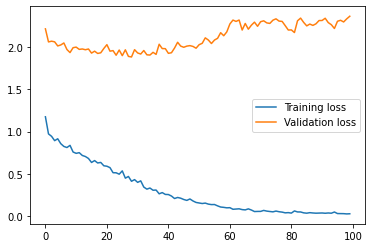

In [31]:
# fit the model
history = model.fit(trainX, trainY, epochs=100, batch_size=36, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [32]:
forecast = model.predict(trainX)

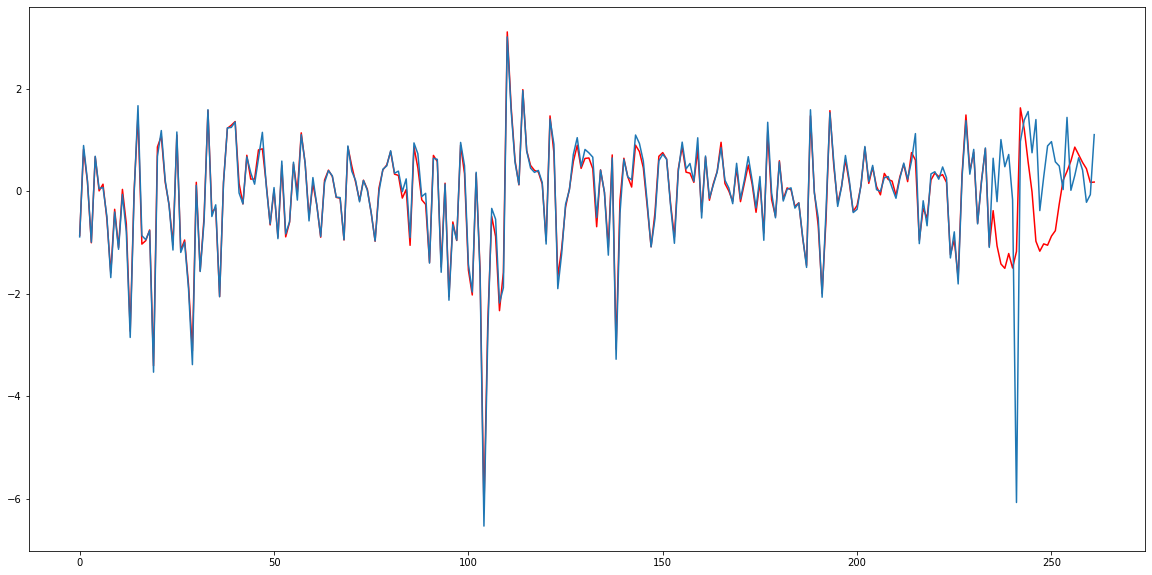

In [33]:
plt.figure(figsize= (20, 10))
plt.plot(forecast, color = "red")
plt.plot(trainY)
plt.show()